<a href="https://colab.research.google.com/github/darpan02-cypher/Big-Data-Analytics/blob/main/Pycaret/example_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pycaret-

PyCaret is an open-source, low-code machine learning library in Python that aims to automate machine learning workflows. It's essentially a wrapper around several popular machine learning libraries and frameworks, like scikit-learn, XGBoost, LightGBM, and CatBoost.

Here's what makes PyCaret useful:

-**Increased Productivity **: PyCaret can automate many tasks involved in a typical machine learning project, such as data preprocessing, feature engineering, model selection, hyperparameter tuning, and model evaluation. This allows data scientists to focus on the more important aspects of their projects, like understanding the data and interpreting the results.

-**Ease of Use**: PyCaret provides a simple and intuitive API that makes it easy to use, even for beginners. It also offers a wide range of pre-built functions and modules that cover a variety of machine learning tasks, such as classification, regression, clustering, and anomaly detection.

-**Model Explainability**: PyCaret provides tools for interpreting and explaining the results of your machine learning models. This is important for understanding how the models work and for ensuring that they are fair and unbiased.

How PyCaret Works:

PyCaret uses a pipeline-based approach to automate the machine learning workflow. This means that it breaks down the process into a series of steps that are executed in order. Each step can be customized, and you can easily add or remove steps as needed.

How it's Used in the Code:

In the provided code, PyCaret is used to:

+Load and preprocess the insurance dataset.

+Train a Random Forest model for predicting insurance charges.

+Evaluate the performance of the model.

+Interpret the model's results.

+Deploy the model for making predictions on new data.

#The code uses the PyCaret library to build a machine learning model for predicting insurance charges.

Here's a breakdown of the steps:

1.Installation and Import: It installs the pycaret library and checks if the installation was successful. Then, necessary modules for regression tasks in PyCaret are imported.

2.Data Loading and Exploration: It loads the 'insurance' dataset from PyCaret's built-in datasets and performs basic data exploration using describe() and unique() functions.

3.Model Setup and Training: It initializes the PyCaret environment for regression using setup() and defines 'charges' as the target variable for prediction. A Random Forest model (rf) is created using create_model().

4.Model Evaluation and Interpretation: The model's performance is visualized with an error plot using plot_model() and further interpreted using interpret_model().

5.Model Finalization and Prediction: The model is finalized using finalize_model() for deployment and then used to predict insurance charges for new data points with predict_model().

6.Model Saving: Finally, the trained model is saved to a file named 'rf_model' using save_model() for future use.

In essence, the code demonstrates a typical machine learning workflow using PyCaret: data loading, preprocessing, model training, evaluation, and deployment. The specific task is to predict insurance charges based on factors like age, sex, BMI, and smoking habits.

In [ ]:
# prompt: install pycaret

!pip install pycaret


  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
import pandas as pd

In [ ]:
# prompt: how to check if pycaret is installed or not

import importlib.util

spec = importlib.util.find_spec("pycaret")
if spec is None:
    print("pycaret is not installed.")
else:
    print("pycaret is installed.")


pycaret is installed.


In [ ]:
# import dataset
from pycaret.datasets import get_data
df_insurance = get_data('insurance')

# to see all the datasets in PyCaret
#all_datasets = get_data('index')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# let's inspect the attributes
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# Importing module and initializing setup
from pycaret.regression import *
#reg1 = setup(data = df_insurance, target = 'charges')
reg1 = setup(data = df_insurance, target = 'charges', numeric_features=['children'])

,Description,Value
0,Session id,6288
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,1
8,Categorical features,3
9,Preprocess,True


In [ ]:
# return best model
rf = create_model('rf')

# run this is you want to compare all the models
#best = compare_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2217.7894,16817793.6259,4100.9503,0.8984,0.4349,0.2173
1,3557.6907,42293042.3716,6503.3101,0.6840,0.5352,0.2888
2,2956.1347,24585798.6613,4958.4069,0.8121,0.4626,0.4134
3,2887.8323,30517773.8692,5524.2894,0.8114,0.4705,0.2343
4,2918.0558,26191584.5515,5117.7714,0.8218,0.4612,0.3848
5,2540.0858,20900499.9166,4571.7065,0.8248,0.4380,0.3068
6,3218.4371,31294264.5423,5594.1277,0.7406,0.5746,0.3693
7,1662.3000,8184854.4190,2860.9185,0.9404,0.3358,0.2756
8,2771.4144,18948270.8144,4352.9612,0.8681,0.4653,0.4120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

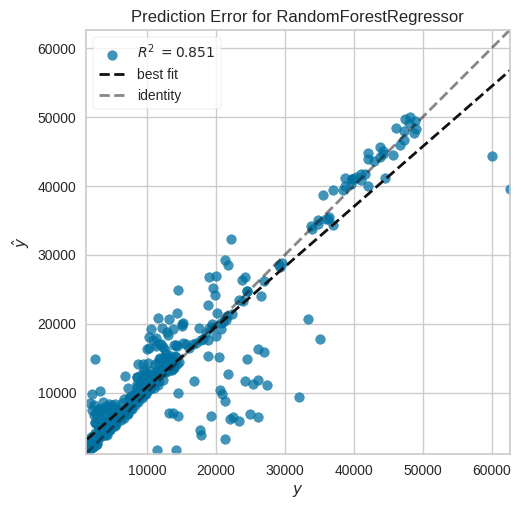

In [ ]:
plot_model(rf, plot = 'error')

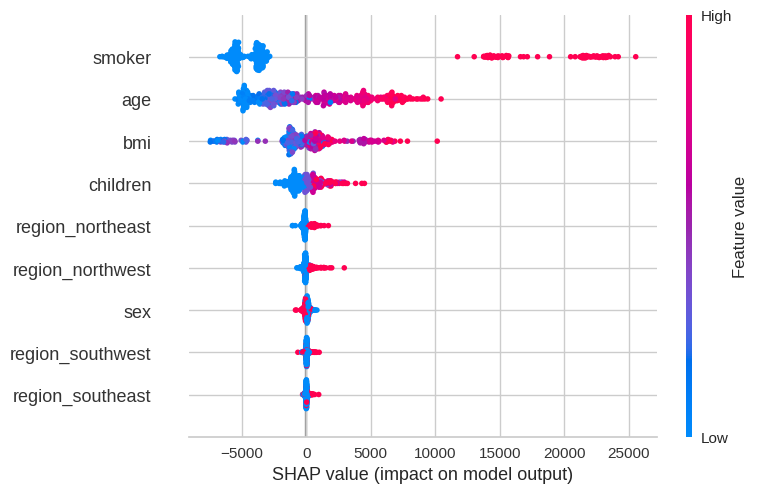

In [ ]:
# interpreting model
interpret_model(rf)

In [ ]:
# finalize a model - use all the data in training
final_rf = finalize_model(rf)

In [ ]:
# generate predictions on unseen data

test_data = pd.DataFrame({'age': [35],
                          'sex': ['female'],
                          'bmi': [21],
                          'children' : [0],
                          'smoker': ['no'],
                          'region': ['southeast']})

predictions = predict_model(final_rf, data = test_data)
predictions

In [ ]:
# save a model
save_model(final_rf, 'rf_model')